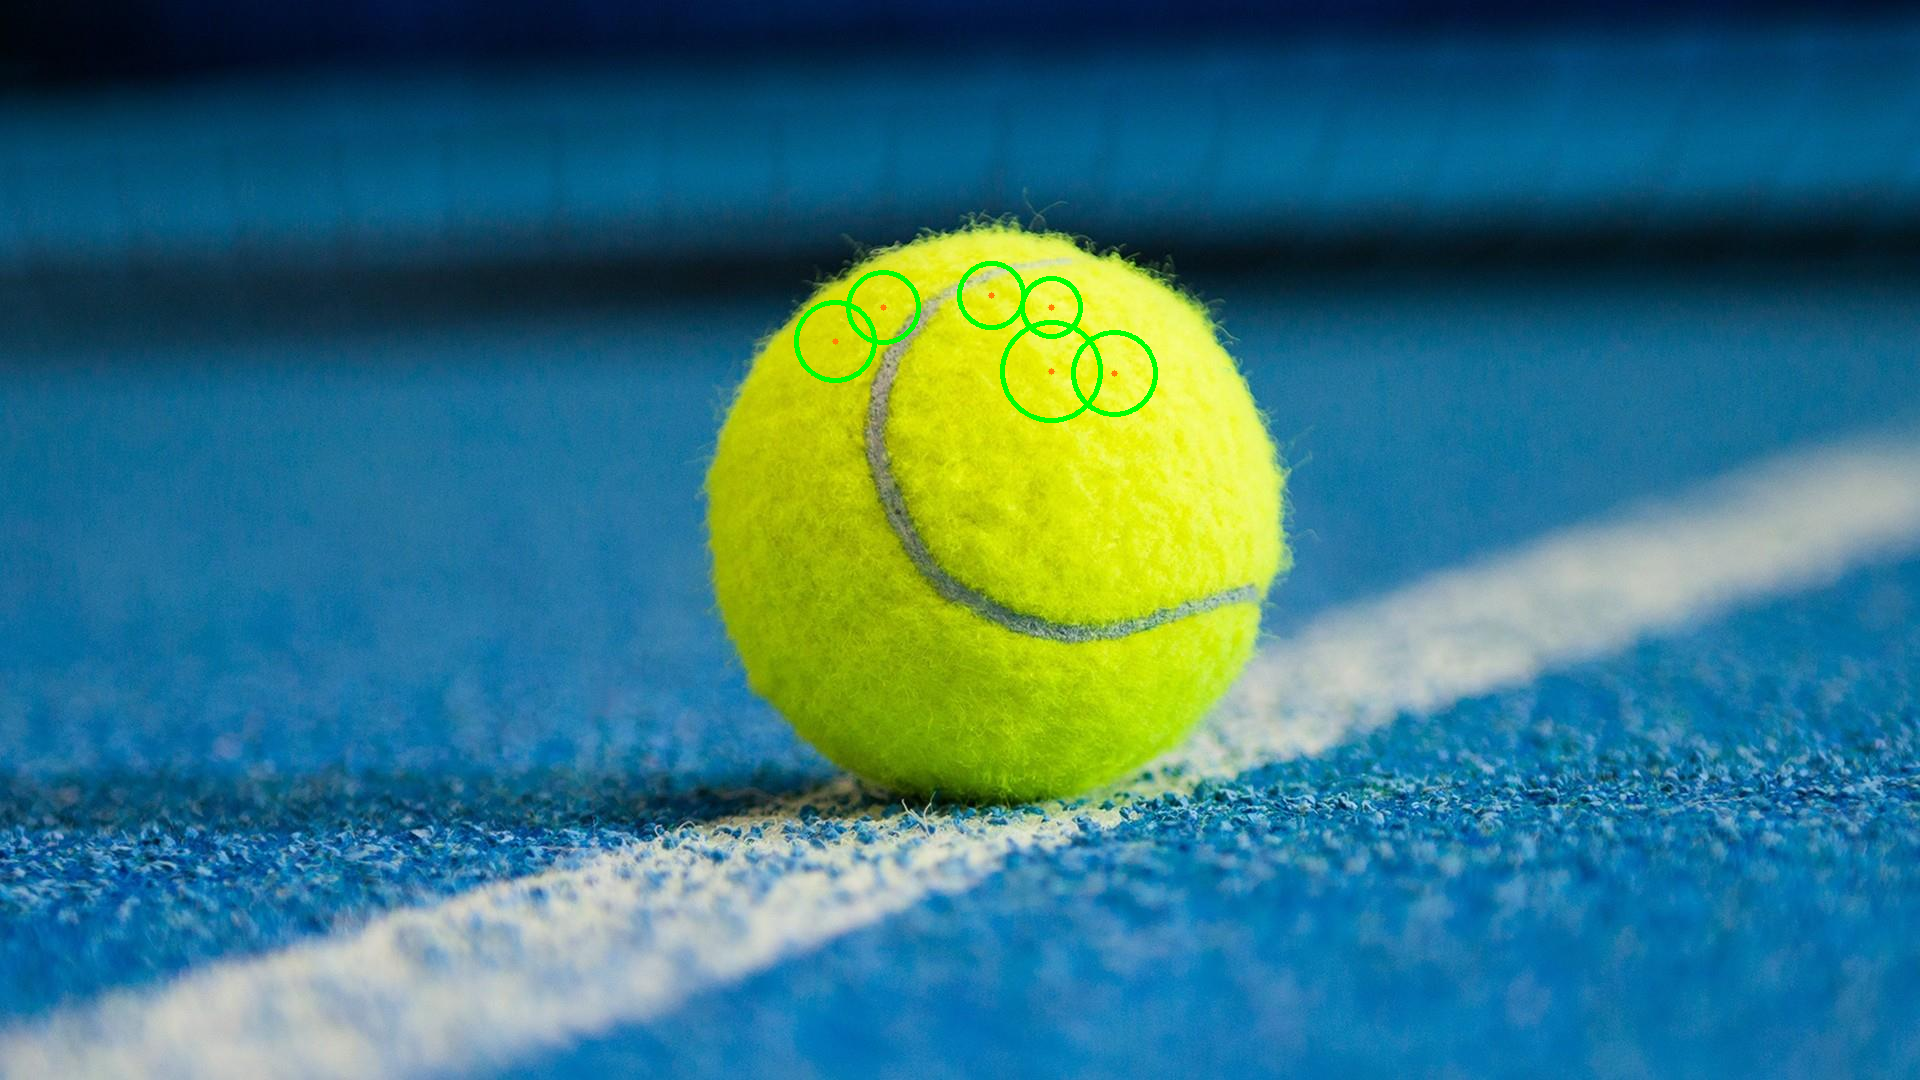

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_tennis_ball(image_path):
    # Load the image
    image = cv2.imread('/content/sample_data/tennis.jpg')
    if image is None:
        print("Error: Unable to load image.")
        return

    # Step 1: Convert to HSV color space to create a mask for the tennis ball
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the color range for a tennis ball (usually yellow-green)
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    # Create a mask for the tennis ball
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Apply the mask to the original image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Convert to grayscale
    gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # Step 2: Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Step 3: Use Hough Circle Transform to detect circles
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                               param1=50, param2=30, minRadius=10, maxRadius=50)

    # Step 4: Draw the detected circles
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            # Draw the outer circle
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            # Draw the center of the circle
            cv2.circle(image, (x, y), 3, (0, 128, 255), -1)

    # Display the result
    cv2_imshow(image)

# Path to the image
image_path = '/content/sample_data/tennis.jpg'

# Detect the tennis ball in the image
detect_tennis_ball(image_path)
